In [125]:
import numpy as np
import matplotlib.pyplot as plt

In [126]:
# Constants
c = 2.998e8
h = 6.626e-34
k = 1.381e-23

v_0 = 3.29e15 
alpha = {"5000": 4.54e-19, "10000": 2.59e-19, "20000": 2.52e-19}
n_H = 1e6

radii = {"1": 6.96e8, "7": 1.8722e9, "12": 3.789e9}
luminosities = {"1": 3.9e26, "7": 4.0e29, "12": 4.0e30}
temperatures = {"1": 5796.25855, "7": 20000, "12": 25000}

In [127]:
def function(v,R, T_star):
    numerator = (8 * np.pi**2 * R**2 * v**2) / (c**2)
    denominator = np.exp((h * v) / (k * T_star)) - 1
    y = numerator / denominator
    return y

def integral(v):
    Q_values = []
    for r_key, r in radii.items():
        T_s = temperatures[r_key]  
        integral_sum = 0
        for i in range(1, len(v)):
            integral_sum += function(v[i], r, T_s) * (v[i] - v[i-1])
        Q_values.append(integral_sum)
    return Q_values

def stromgren(Q_array):
    radius = []
    for Q_value in Q:
        r_1 = ((3 * Q_value) / (4 * np.pi * n_H**2 * alpha['10000']))**(1/3)
        radius.append(f'{r_1:4e}')
    return radius
    
v = np.linspace(v_0, 0.5e16, 100000)

Q = integral(v)
r_stromgren = stromgren(Q)

print(Q)
print(r_stromgren)

[8.909206779845996e+35, 6.437080937560383e+45, 1.6242599178998629e+47]
['9.364478e+13', '1.810368e+17', '5.309933e+17']


In [128]:
freq = 1e16
function(freq,radii['1'], temperatures['1'])

0.047788574250661714

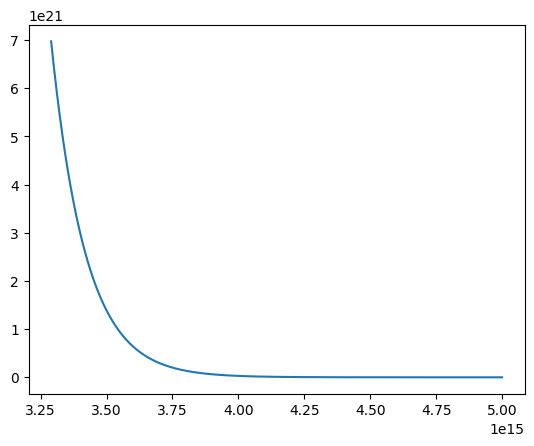

In [129]:
plt.plot(v, function(v,6.96e8, 5800), label='Proton Density')
plt.show()